In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("C:\\Users\\user\\Desktop\\house_price_prediction.csv")

In [4]:
data.shape

(4600, 13)

In [5]:
data.head()

,PRICE,BEDROOMS,BATHROOMS,sqft_living,FLOORS,waterfront,CONDITION,sqft_above,yr_built,street,CITY,statezip,country
0,313000.0,3,2,1340,2,0,3,1340,1955,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,3,3650,2,0,5,3370,1921,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2,1930,1,0,4,1930,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2,2000,1,0,4,1000,1963,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,3,1940,1,0,4,1140,1976,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
UnwantedCols = ['street', 'CITY', 'statezip','country']


data.drop(UnwantedCols , axis = 1, inplace = True)
data.head()

,PRICE,BEDROOMS,BATHROOMS,sqft_living,FLOORS,waterfront,CONDITION,sqft_above,yr_built
0,313000.0,3,2,1340,2,0,3,1340,1955
1,2384000.0,5,3,3650,2,0,5,3370,1921
2,342000.0,3,2,1930,1,0,4,1930,1966
3,420000.0,3,2,2000,1,0,4,1000,1963
4,550000.0,4,3,1940,1,0,4,1140,1976


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRICE        4600 non-null   float64
 1   BEDROOMS     4600 non-null   int64  
 2   BATHROOMS    4600 non-null   int64  
 3   sqft_living  4600 non-null   int64  
 4   FLOORS       4600 non-null   int64  
 5   waterfront   4600 non-null   int64  
 6   CONDITION    4600 non-null   int64  
 7   sqft_above   4600 non-null   int64  
 8   yr_built     4600 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.6 KB


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop(['PRICE'],axis=1)
Y = data['PRICE']

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
train_data= X_train.join(Y_train)

In [22]:
train_data

,BEDROOMS,BATHROOMS,sqft_living,FLOORS,waterfront,CONDITION,sqft_above,yr_built,PRICE
109,4,2,1240,1,0,3,1240,1971,220000.0
2350,2,1,710,2,0,4,710,1943,399950.0
3534,4,3,3900,1,0,5,2520,1972,1619999.0
4000,5,2,1650,2,0,3,1650,1902,443000.0
1336,2,1,1180,1,0,3,1180,1918,160000.0
...,...,...,...,...,...,...,...,...,...
1201,2,1,1060,2,0,3,1060,1979,353250.0
3316,3,2,1190,1,0,3,970,1940,500000.0
3292,2,3,1590,2,0,3,1590,1997,409900.0
1306,4,2,2670,2,0,3,2670,1996,347000.0


array([[<Axes: title={'center': 'BEDROOMS'}>,
        <Axes: title={'center': 'BATHROOMS'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'FLOORS'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'CONDITION'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

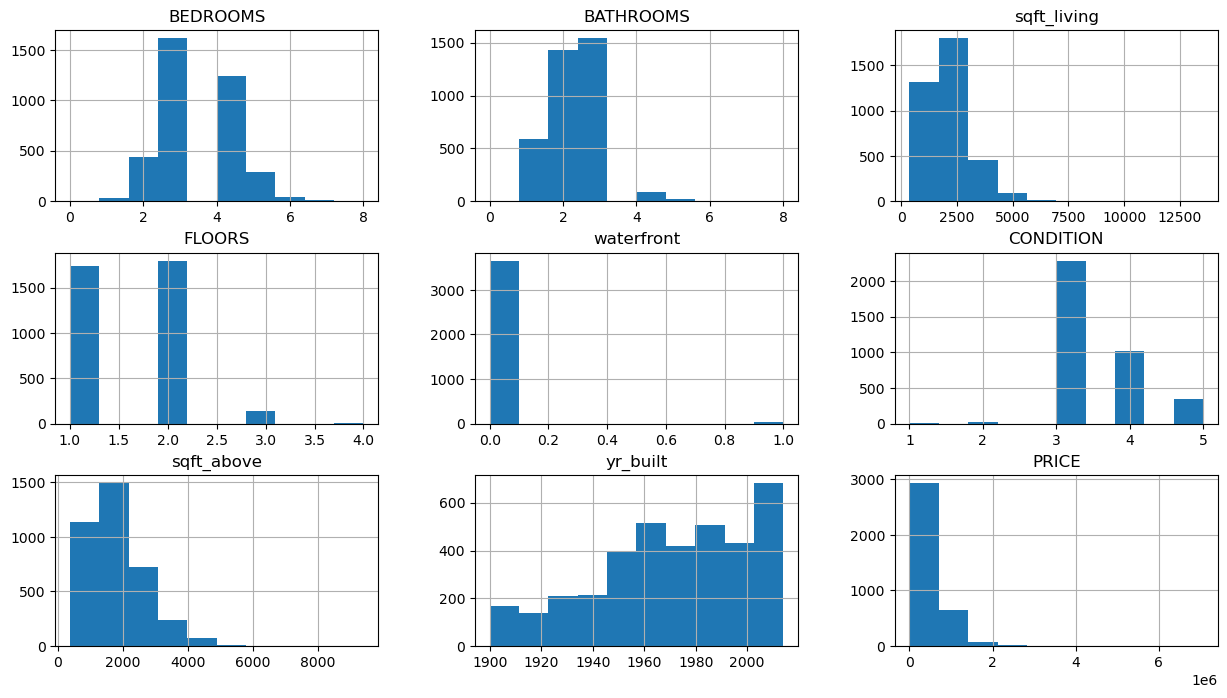

In [26]:
train_data.hist(figsize=(15,8))

<Axes: >

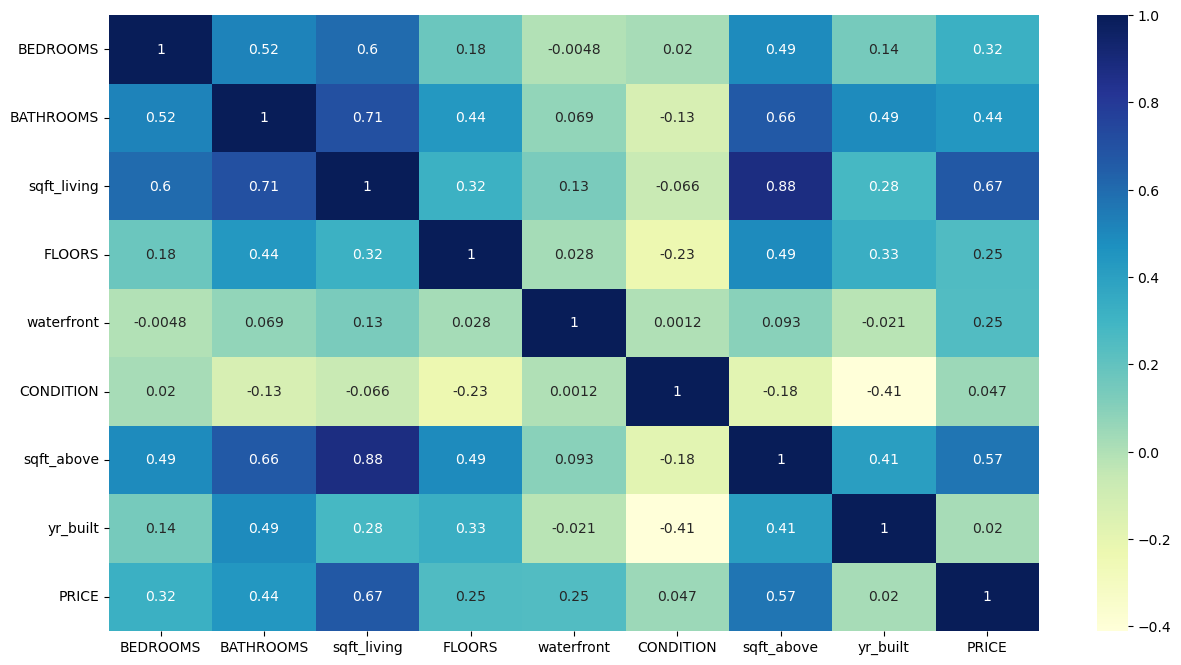

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True ,cmap= "YlGnBu")


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = data.drop('PRICE', axis=1) 
y = data['PRICE']             
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [70]:
linear_model = LinearRegression()

linear_model.fit(X_train, Y_train)



LinearRegression()

In [73]:
Y_pred_linear = linear_model.predict(X_test)

In [74]:
mse_linear = mean_squared_error(Y_test,Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

In [76]:
print("Linear Regression Model:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")



Linear Regression Model:
Mean Squared Error: 990533094335.0304
R-squared: 0.028742806244075436


In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [61]:
Y_pred_rf = rf_model.predict(X_test)

In [62]:
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

In [63]:
print("\nRandom Forest Model:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Model:
Mean Squared Error: 993867812479.177
R-squared: 0.02547298214110072


In [75]:
print("Thank you for using our House Price Prediction model!")


Thank you for using our House Price Prediction model!
